<hr>
Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)<br>
<img align="left" width="40%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" \><br><br>
<hr>

Read observation stations file from European Climate Assessment & Dataset

https://www.ecad.eu//download/millennium/millennium.php

<pre>
wget https://www.ecad.eu//download/millennium/data/ECA_indexTG.zip
mkdir data
unzip ECA_indexTG.zip -d data
</pre>

File: stations.txt
Error at line 318 because there is an extra comma

<pre>
394  ,KISINEV                                 ,MOLDOVA, REPUBLIC OF                    ,+47:01:12,+028:52:12, 173
</pre>

stations2.txt is the same without this typo error.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

### Read file

In [2]:
dfStations = pd.read_csv('data/stations2.txt', header=None, skiprows=20)
dfStations.rename(columns={
                   0: "STAID", 
                   1: "STATIONNAME", 
                   2: "COUNTRYNAME", 
                   3: "LAT", 
                   4: "LON", 
                   5: "HGT",
                  }, inplace=True)
dfStations['STATIONNAME'] = dfStations['STATIONNAME'].apply(lambda x: x.strip())
dfStations['COUNTRYNAME'] = dfStations['COUNTRYNAME'].apply(lambda x: x.strip())
dfStations

,STAID,STATIONNAME,COUNTRYNAME,LAT,LON,HGT
0,4,LINKOEPING,SWEDEN,+58:24:00,+015:31:59,93
1,5,LINKOEPING-MALMSLAETT,SWEDEN,+58:24:00,+015:31:59,93
2,6,KARLSTAD,SWEDEN,+59:21:00,+013:28:00,46
3,7,KARLSTAD-AIRPORT,SWEDEN,+59:26:40,+013:20:15,107
4,8,OESTERSUND,SWEDEN,+63:10:59,+014:28:59,376
...,...,...,...,...,...,...
6412,20062,NORDLI - SANDVIKA,NORWAY,+64:27:33,+013:35:52,420
6413,20063,SKARDSBOEFJELLET,NORWAY,+61:13:00,+007:01:05,713
6414,20064,SKISTUA,NORWAY,+63:25:05,+010:15:51,433
6415,20065,AASTA HANSTEEN,NORWAY,+67:16:28,+007:39:15,52


In [3]:
dfStations['COUNTRYNAME'].unique()

array(['SWEDEN', 'AUSTRIA', 'BELGIUM', 'BULGARIA', 'CROATIA', 'CYPRUS',
       'FINLAND', 'FRANCE', 'GERMANY', 'GREECE', 'HUNGARY', 'ICELAND',
       'RUSSIAN FEDERATION', 'DENMARK', 'IRELAND', 'ISRAEL',
       'NETHERLANDS', 'ITALY', 'NORWAY', 'LATVIA', 'LITHUANIA',
       'LUXEMBOURG', 'POLAND', 'PORTUGAL', 'ROMANIA', 'SLOVAKIA',
       'SLOVENIA', 'SPAIN', 'SWITZERLAND', 'TURKEY', 'UKRAINE',
       'UNITED KINGDOM', 'SERBIA', 'ESTONIA', 'REPUBLIC OF MACEDONIA',
       'BOSNIA AND HERZEGOVINA', 'ALBANIA', 'ALGERIA', 'ARMENIA',
       'GREENLAND [DENMARK]', 'EGYPT', 'TURKMENISTAN', 'KAZAKHSTAN',
       'AZERBAIJAN', 'MOLDOVA REPUBLIC OF', 'BELARUS', 'GEORGIA',
       'MOROCCO', 'TUNISIA', 'LIECHTENSTEIN', 'GIBRALTAR', 'UZBEKISTAN',
       'KYRGYZSTAN', 'TAJIKISTAN', 'MONTENEGRO', 'SVALBARD AND JAN MAYEN'],
      dtype=object)

In [4]:
len(dfStations['COUNTRYNAME'].unique())

56

### Convert string to correct positions

In [5]:
# https://stackoverflow.com/questions/50193159/converting-pandas-data-frame-with-degree-minute-second-dms-coordinates-to-deci

def dms2dd(s):
    # example: s = '+007:12:51'
    degrees, minutes, seconds = re.split('[:]+', s)
    #print(degrees, minutes, seconds)
    dd = abs(float(degrees)) + float(minutes)/60 + float(seconds)/(60*60);
    if float(degrees) < 0:
        dd*= -1
    return dd

dms2dd('-007:12:51')

-7.214166666666667

In [6]:
dfStations['LON'] = dfStations['LON'].apply(dms2dd)
dfStations['LAT'] = dfStations['LAT'].apply(dms2dd)

In [7]:
dfStations

,STAID,STATIONNAME,COUNTRYNAME,LAT,LON,HGT
0,4,LINKOEPING,SWEDEN,58.400000,15.533056,93
1,5,LINKOEPING-MALMSLAETT,SWEDEN,58.400000,15.533056,93
2,6,KARLSTAD,SWEDEN,59.350000,13.466667,46
3,7,KARLSTAD-AIRPORT,SWEDEN,59.444444,13.337500,107
4,8,OESTERSUND,SWEDEN,63.183056,14.483056,376
...,...,...,...,...,...,...
6412,20062,NORDLI - SANDVIKA,NORWAY,64.459167,13.597778,420
6413,20063,SKARDSBOEFJELLET,NORWAY,61.216667,7.018056,713
6414,20064,SKISTUA,NORWAY,63.418056,10.264167,433
6415,20065,AASTA HANSTEEN,NORWAY,67.274444,7.654167,52


### Create a map

In [8]:
from ipywidgets import HTML
from ipyleaflet import Map, Marker, Popup, CircleMarker

center = (45, 3)

m = Map(center=center, zoom=5)

for index, row in dfStations.iterrows():
  
    if row['COUNTRYNAME'] in ['FRANCE', 'GERMANY', 'ITALY']: 
        circle_marker = CircleMarker()
        circle_marker.location = (row['LAT'], row['LON'])
        circle_marker.radius = 5
        circle_marker.weight = 0
        circle_marker.fill_opacity = 0.4

        if row['COUNTRYNAME'] == 'FRANCE' :  
            circle_marker.color = "red"
            circle_marker.fill_color = "red"
        elif row['COUNTRYNAME'] == 'GERMANY' :
            circle_marker.color = "blue"
            circle_marker.fill_color = "blue"
        elif row['COUNTRYNAME'] == 'ITALY' :
            circle_marker.color = "green"
            circle_marker.fill_color = "green"     
        m.add_layer(circle_marker)

display(m)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [9]:
from ipywidgets import HTML
from ipyleaflet import Map, Marker, Popup, CircleMarker

center = (45, 3)

m = Map(center=center, zoom=5)

for index, row in dfStations.iterrows():
  
    if row['COUNTRYNAME'] in ['FRANCE']: 
        circle_marker = CircleMarker()
        circle_marker.location = (row['LAT'], row['LON'])
        circle_marker.radius = 5
        circle_marker.weight = 1
        circle_marker.fill_opacity = 0.4
        circle_marker.color = "red"
        circle_marker.fill_color = "red"
        message = HTML()
        message.value = "%s %s %s" %(row['STAID'], row['COUNTRYNAME'], row['STATIONNAME'])       
        circle_marker.popup = message   
        
        m.add_layer(circle_marker)

display(m)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

### Reading a data file

In [10]:
#df1 = pd.read_csv('data/indexTG011322.txt', header=None, delim_whitespace=True, skiprows=30, na_values=['-999999'])
df1 = pd.read_csv('data/indexTG000038.txt', header=None, delim_whitespace=True, skiprows=30, na_values=['-999999'])
df1.rename(columns={
                   0: "SOUID", 
                   1: "YEAR", 
                   2: "ANNUAL", 
                   3: "WINTER HALF YEAR", 
                   4: "SUMMER HALF YEAR", 
                   5: "WINTER (DJF)",
                   6: "SPRING (MAM)",
                   7: "SUMMER (JJA)",
                   8: "AUTUMN (SON)"
                  }, inplace=True)
df1['Date'] =  pd.to_datetime(df1['YEAR'], format='%Y')
df1.set_index('Date', inplace=True)
df1.head()

,SOUID,YEAR,ANNUAL,WINTER HALF YEAR,SUMMER HALF YEAR,WINTER (DJF),SPRING (MAM),SUMMER (JJA),AUTUMN (SON),9,...,11,12,13,14,15,16,17,18,19,20
Date,,,,,,,,,,,,,,,,,,,,,
1873-01-01,38,1873,1061,NaN,1513,NaN,967,1855,1063,492,...,831,885,1184,1673,1974,1911,1431,1075,683,306
1874-01-01,38,1874,1086,607.0,1614,390.0,1007,1892,1130,452,...,696,1170,1160,1750,2136,1784,1674,1142,574,39
1875-01-01,38,1875,1072,498.0,1633,234.0,1041,1817,1118,501,...,545,1021,1555,1740,1764,1946,1758,978,623,216
1876-01-01,38,1876,1106,493.0,1577,216.0,970,1912,1157,6,...,694,1049,1170,1687,2042,2000,1500,1284,682,688
1877-01-01,38,1877,1096,756.0,1512,662.0,901,1879,1036,623,...,570,998,1139,1965,1820,1855,1284,1002,824,377


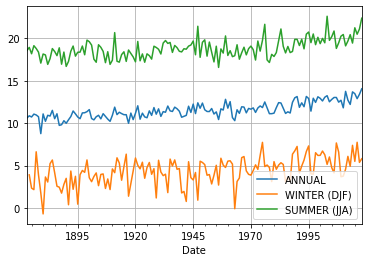

In [11]:
(df1[['ANNUAL', 'WINTER (DJF)', 'SUMMER (JJA)']]/100).plot(grid=True)

In [12]:
print('Date start: %d\nDate end: %d\nSize: %d\nMissing: %d' \
          %(df1['YEAR'].iloc[0], df1['YEAR'].iloc[-1], df1['YEAR'].size, df1['YEAR'].size-df1['ANNUAL'].count()))

Date start: 1873
Date end: 2018
Size: 146
Missing: 0


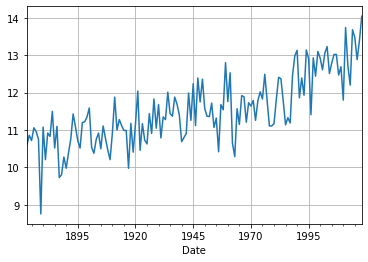

In [13]:
(df1['ANNUAL']/100).plot(grid=True)

In [14]:
print((df1['ANNUAL']/100).mean(), (df1['ANNUAL']/100).max(), (df1['ANNUAL']/100).min())

11.531917808219184 14.04 8.76


In [15]:
df1[ df1['YEAR'] >= 2000]['ANNUAL'].mean()/100.

12.958947368421052

In [16]:
df1[(df1['YEAR'] >= 1980) & (df1['YEAR'] < 2010)]['ANNUAL'].mean()/100

12.405666666666667

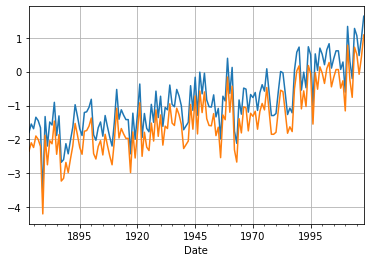

In [17]:
anomalies = (df1['ANNUAL']-df1[(df1['YEAR'] >= 1980) & (df1['YEAR'] < 2010)]['ANNUAL'].mean())/100
anomalies2 = (df1['ANNUAL']-df1[(df1['YEAR'] >= 2000)]['ANNUAL'].mean())/100
anomalies.plot(grid=True)
anomalies2.plot(grid=True)

In [20]:
min=-1.6
max=1.6
delta=0.2
levels = np.arange(min,max,delta)
cmap = plt.get_cmap('RdBu_r')
colors = cmap(np.linspace(0, 1, len(levels)+1))
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend='both')

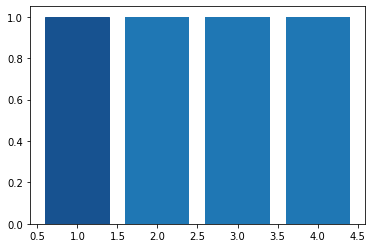

In [21]:
barlist=plt.bar([1,2,3,4], [1,1,1,1], width=0.8)
barlist[0].set_color(cmap(norm(-1.5)))
plt.show()

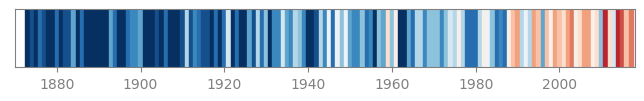

In [22]:
anomalies = (df1['ANNUAL']-df1[(df1['YEAR'] >= 1980) & (df1['YEAR'] < 2010)]['ANNUAL'].mean())/100

min=-1.6
max=1.6
delta=0.2
allLevels = np.arange(min,max+delta,delta)
cmap = plt.get_cmap('RdBu_r')
colors = cmap(np.linspace(0, 1, len(allLevels)+1))
cmap, norm = matplotlib.colors.from_levels_and_colors(allLevels, colors, extend='both')
    
dateStart = 1870
dateEnd = 2018
    
x=[]
y=[]
for i in range(dateStart, dateEnd):
    x.append(i)

    try: 
        if (not np.isnan(anomalies.loc[str(i)][0])):
                c = cmap(norm(anomalies.loc[str(i)][0]))
        else:
                c = (0,1,0)               # missing 
    except:
        c = (1,1,1)
            
    y.append(c)
    
    
fig, axes = plt.subplots(figsize=(8, 1), dpi=100)
fig.subplots_adjust(bottom=0.3)
barlist = plt.bar(x, width=1, height=20)
for i in range(len(x)):
    barlist[i].set_color(y[i])    
axes.get_yaxis().set_visible(False)
axes.set_xlim([dateStart,dateEnd])
axes.set_ylim([0,8])
color = 'gray'
axes.tick_params(axis='x', colors=color)
axes.spines['bottom'].set_color(color)
axes.spines['top'].set_color(color) 
axes.spines['right'].set_color(color)
axes.spines['left'].set_color(color)

fig.savefig('stripes2.png', bbox_inches='tight')
#plt.close(fig)

In [23]:
def read_date(file):
    
    df = pd.read_csv(file, header=None, delim_whitespace=True, skiprows=30, na_values=['-999999'])
    df.rename(columns={
        0: "SOUID", 
        1: "YEAR",
        2: "ANNUAL", 
        3: "WINTER HALF YEAR", 
        4: "SUMMER HALF YEAR", 
        5: "WINTER (DJF)",
        6: "SPRING (MAM)",
        7: "SUMMER (JJA)",
        8: "AUTUMN (SON)"
        }, inplace=True)
    df['Date'] =  pd.to_datetime(df['YEAR'], format='%Y')
    df.set_index('Date', inplace=True)
    
    return df['YEAR'].iloc[0]

In [27]:
def read_data(file, verbose=False, displayPNG=True, levels=[-1.6,1.6,0.2]):
    
    s = pd.read_csv(file, skiprows=8, nrows=1)
    countryName = s.iloc[0][0][33:74].strip()
    stationName = s.iloc[0][0][74:115].strip()
    
    df = pd.read_csv(file, header=None, delim_whitespace=True, skiprows=30, na_values=['-999999'])
    df.rename(columns={
        0: "SOUID", 
        1: "YEAR",
        2: "ANNUAL", 
        3: "WINTER HALF YEAR", 
        4: "SUMMER HALF YEAR", 
        5: "WINTER (DJF)",
        6: "SPRING (MAM)",
        7: "SUMMER (JJA)",
        8: "AUTUMN (SON)"
        }, inplace=True)
    df['Date'] =  pd.to_datetime(df['YEAR'], format='%Y')
    df.set_index('Date', inplace=True)
    
    nbGood1 = df[(df['YEAR'] >= 1980) & (df['YEAR'] < 2010)]['YEAR'].count()
    if (nbGood1 != 30):
        return -1     # EXIT_FAILURE
             
    anomalies = (df['ANNUAL']-df[(df['YEAR'] >= 1980) & (df['YEAR'] < 2010)]['ANNUAL'].mean())/100
    
    min=levels[0]
    max=levels[1]
    delta=levels[2]
    allLevels = np.arange(min,max+delta,delta)
    cmap = plt.get_cmap('RdBu_r')
    colors = cmap(np.linspace(0, 1, len(allLevels)+1))
    cmap, norm = matplotlib.colors.from_levels_and_colors(allLevels, colors, extend='both')
    
    dateStart = 1870
    dateEnd = 2018
    
    x = []
    y = []
    for i in range(dateStart, dateEnd):
        x.append(i)
        
        try: 
            if (not np.isnan(anomalies.loc[str(i)][0])):
                c = cmap(norm(anomalies.loc[str(i)][0]))
            else:
                c = (0.8,0.8,0.8)               # missing 
        except:
            c = (1,1,1)
            
        y.append(c)
          
    plt.ioff()
    fig, axes = plt.subplots(figsize=(8, 1))
    fig.subplots_adjust(bottom=0.3)
    barlist = plt.bar(x, height=10)
    for i in range(len(x)):
        barlist[i].set_color(y[i])    
    axes.get_yaxis().set_visible(False)
    axes.set_xlim([dateStart,dateEnd+1])
    axes.set_ylim([0,8])
    color = 'gray'
    axes.tick_params(axis='x', colors=color)
    axes.spines['bottom'].set_color(color)
    axes.spines['top'].set_color(color) 
    axes.spines['right'].set_color(color)
    axes.spines['left'].set_color(color)
    
    if verbose:
        print(countryName, stationName)
        print('Mean: %f' %(df[(df['YEAR'] >= 1980) & (df['YEAR'] < 2010)]['ANNUAL'].mean()/100))
        print('Date start: %d\nDate end: %d\nSize: %d\nMissing: %d' \
          %(df['YEAR'].iloc[0], df['YEAR'].iloc[-1], df['YEAR'].size, df['YEAR'].size-df['ANNUAL'].count()))
        print('Min: %6.2f\nMax: %6.2f' %(np.nanmin(anomalies),np.nanmax(anomalies)))
        
    STATID = file[-10:-4]
    #print('stripes/' + STATID + '.png')
    fig.savefig(STATID + '.png', bbox_inches='tight')
    
    if not displayPNG:
        plt.close(fig)
        
    return 0            # EXIT_SUCCESS

FRANCE BOURGES
Mean: 11.710333
Date start: 1945
Date end: 2018
Size: 74
Missing: 2
Min:  -1.91
Max:   1.45
FRANCE PARIS - MONTSOURIS
Mean: 12.405667
Date start: 1873
Date end: 2018
Size: 146
Missing: 0
Min:  -3.65
Max:   1.63
FRANCE TOULOUSE-BLAGNAC
Mean: 13.750667
Date start: 1947
Date end: 2018
Size: 72
Missing: 1
Min:  -2.28
Max:   1.34


0

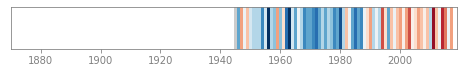

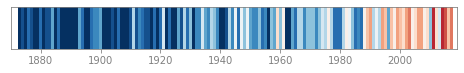

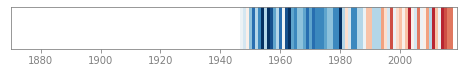

In [28]:
read_data('data/indexTG000032.txt', verbose=True)
read_data('data/indexTG000038.txt', verbose=True)
read_data('data/indexTG000033.txt', verbose=True)

### Create a map with the climate stripes

In [30]:
from ipywidgets import HTML
from ipyleaflet import Map, Marker, Popup, CircleMarker

center = (45, 3)

m = Map(center=center, zoom=5, close_popup_on_click=False)

dfStations['Stripes'] = 0       # will stay to 0 if no error
dfStations['startDate'] = 0
for index, row in dfStations.iterrows():
    
#    if index > 40:
#        break
        
    if row['COUNTRYNAME'] == 'FRANCE' :
        circle_marker = CircleMarker()
        circle_marker.location = (row['LAT'], row['LON'])
        circle_marker.radius = 5
        circle_marker.color = "royalblue"
        circle_marker.weight = 1
        circle_marker.fill_color = "royalblue"
        circle_marker.fill_opacity = 0.4
        
        file = 'data/indexTG0%05d.txt' % row['STAID']
        
        a = read_data(file, displayPNG=False, levels=[-1.6,1.6,0.2])
        dfStations.loc[index, 'startDate'] = read_date(file)
        
        if (a != -1):
            message = HTML()
            STATID = file[-10:-4]
            message.value = "%s (%s)" %(row['STATIONNAME'],file)  + '<br><img style="width: 400px;" src="' + STATID + '.png">'
            circle_marker.popup = message
            m.add_layer(circle_marker)
            
        else:
            dfStations.loc[index, 'Stripes'] = 1

display(m)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [29]:
a = dfStations[(dfStations['COUNTRYNAME'] == 'FRANCE') & (dfStations['Stripes'] == 0)].copy()
a.drop(columns=['Stripes'], inplace=True)

KeyError: 'Stripes'

In [48]:
a.to_json("data.json", orient='values')

In [49]:
len(a)

123

In [50]:
! mv *.png stripes

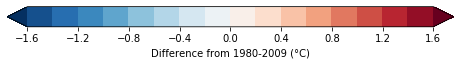

In [51]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

fig, ax = plt.subplots(figsize=(8, 1))
fig.subplots_adjust(bottom=0.6)

min=-1.6
max=1.6
delta=0.2
allLevels = np.arange(min,max+delta,delta)
cmap = plt.get_cmap('RdBu_r')
colors = cmap(np.linspace(0, 1, len(allLevels)+1))
cmap, norm = matplotlib.colors.from_levels_and_colors(allLevels, colors, extend='both')

cb1 = mpl.colorbar.ColorbarBase(ax, 
                                cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                                extend='both')
cb1.set_label('Difference from 1980-2009 (°C)')

fig

fig.savefig('legend.png')